In [1]:
# TASK 2: SENTIMENT ANALYSIS
import pandas as pd
import numpy as np
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = {
    'review': [
        "I love this product! It's amazing.",
        "Worst purchase ever. Total waste of money.",
        "Really happy with the service.",
        "Not good. I won't recommend this.",
        "Absolutely fantastic experience.",
        "Terrible quality, broke in 2 days.",
        "I’m satisfied with the quality.",
        "Bad experience. Not buying again.",
        "It’s okay, not the best but decent.",
        "Great value for money!"
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 = Positive, 0 = Negative
}
df = pd.DataFrame(data)
df.head()

,review,sentiment
0,I love this product! It's amazing.,1
1,Worst purchase ever. Total waste of money.,0
2,Really happy with the service.,1
3,Not good. I won't recommend this.,0
4,Absolutely fantastic experience.,1


In [3]:
# Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

In [4]:
# Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


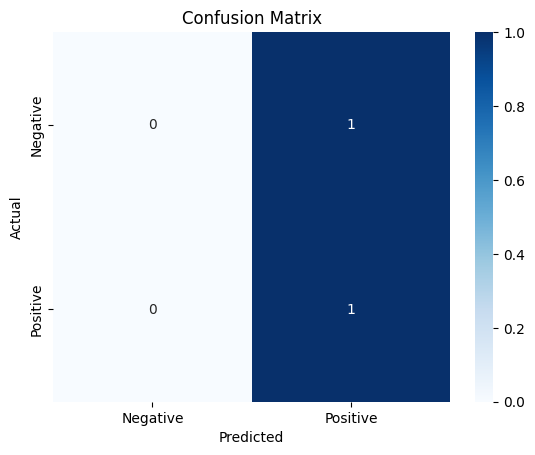

In [6]:
# Evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

def predict_sentiment(text):
    text_clean = clean_text(text)
    vec = vectorizer.transform([text_clean])
    pred = model.predict(vec)[0]
    return "Positive" if pred == 1 else "Negative"

In [7]:
print(predict_sentiment("I hate this item."))
print(predict_sentiment("Absolutely loved it!"))

Positive
Positive
